In [1]:
# 기존 Sequential: 여러 개의 입력, 여러 개의 출력 등을 구현하기 어렵기 때문에
# 여러 개 입력과 출력이 되는 복잡한 모델 구성을 위해선 Functional API 사용해야 함

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# 3차원 배열
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [5]:
# CNN 입력 구조 4차원: Batch x Height x Width x Channel
# Model, Input 함수 추가
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, Flatten, MaxPooling2D, Input

In [6]:
# 28 x 28 shape를 CNN 모델에 입력으로 주기 위해 28 x 28 x 1 shape 변경: 채널 추가
# x_train = x_train[..., tf.newaxis]
# x_test = x_test[..., tf.newaxis]

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# Sequential 모델
# model = Sequential()
# model.add(Conv2D(32, kernel_size = (5,5), strides = (1,1), padding = 'same',
#                 activation='relu',
#                 input_shape = (28, 28, 1))) # 28 x 28 x 32
# model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) # 14 x 14 x 32
# model.add(Conv2D(64, (2, 2), activation='relu', padding = 'same')) #14 x 14 x 64
# model.add(MaxPooling2D(pool_size = (2, 2))) # 7 x 7 x 64
# model.add(Dropout(0.2))
# model.add(Flatten()) # 3136
# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(Dense(10, activation = 'softmax'))

# Functional API 모델링
inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(filters=32, kernel_size = (5, 5), padding = 'same', activation = 'relu')(inputs) # 28 x 28 x 32
pool1 = MaxPooling2D(pool_size=(2,2), strides=(2, 2))(conv1) # 14 x 14 x 32

conv2 = Conv2D(filters = 64, kernel_size = (2, 2), padding = 'same', activation = 'relu')(pool1) # 14 x 14 x 64
pool2 = MaxPooling2D(pool_size=(2,2))(conv2) # 7 x 7 x 64
drop2 = Dropout(0.2)(pool2)

flat3 = Flatten()(drop2) # 3136

dense4 = Dense(units= 128, activation = 'relu')(flat3)
drop4 = Dropout(0.3)(dense4)
outputs = Dense(10, activation = 'softmax')(drop4)

model = Model(inputs= inputs, outputs=outputs)

In [8]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [9]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,914 (1.57 MB)

 Trainable params: 411,914 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
EPOCHS = 5
BATCH_SIZE = 1024

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode = 'max', save_best_only=True, verbose=1)

In [13]:
history = model.fit(x_train, y_train, epochs = EPOCHS, batch_size=BATCH_SIZE, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6199 - loss: 1.2793
Epoch 1: val_accuracy improved from -inf to 0.94570, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.6226 - loss: 1.2702 - val_accuracy: 0.9457 - val_loss: 0.1857
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9383 - loss: 0.2066
Epoch 2: val_accuracy improved from 0.94570 to 0.97440, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.9384 - loss: 0.2061 - val_accuracy: 0.9744 - val_loss: 0.0867
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9654 - loss: 0.1166 
Epoch 3: val_accuracy improved from 0.97440 to 0.98090, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.9654 - loss: 0.1165 - val_accuracy: 0.9809 - val_loss: 0.0601
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9732 - loss: 0.0868 
Epoch 4: val_accuracy improved from 0.98090 to 0.98410, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9732 - loss: 0.0867 - val_accuracy: 0.9841 - val_loss: 0.0484
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9773 - loss: 0.0735 
Epoch 5: val_accuracy improved from 0.98410 to 0.98590, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.9773 - loss: 0.0735 - val_accuracy: 0.9859 - val_loss: 0.0410


In [14]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9830 - loss: 0.0484


[0.04098596051335335, 0.9858999848365784]

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
x_range = range(1, len(history.history['accuracy'])+1)
# history.history['accuracy']: List of accuracy values recorded at the end of each training epoch
# len(history.history['accuracy']): Gives the number of epochs that were run

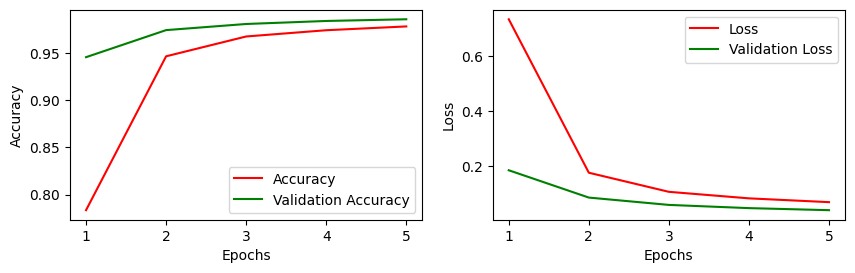

In [45]:
plt.figure(figsize = (10, 6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color = 'red', label = "Accuracy")
plt.plot(x_range, history.history['val_accuracy'], color = 'green', label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color = 'red', label = "Loss")
plt.plot(x_range, history.history['val_loss'], color = 'green', label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()

In [47]:
x_test[0].shape

(28, 28, 1)

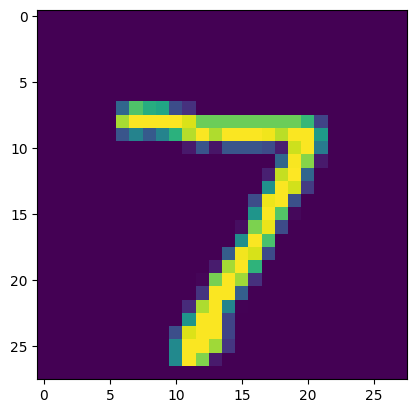

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction Probability:  [[1.8180128e-07 2.7190556e-08 1.0464091e-05 1.7542332e-05 5.2772866e-09
  6.9203999e-08 1.2123522e-12 9.9996448e-01 2.2575325e-08 7.2392077e-06]]
The Answer is  [7]


In [53]:
n = 0
plt.imshow(x_test[n].reshape(28, 28))
plt.show()

pred = model.predict(x_test[n].reshape(1, 28, 28, 1))
answer = np.argmax(pred, axis = -1)

print("Prediction Probability: ", pred)
print("The Answer is ", answer)

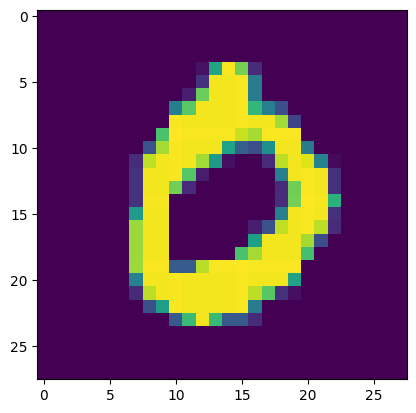

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction Probability:  [[9.9996006e-01 3.0880742e-07 9.7200691e-06 3.5812587e-07 3.8630424e-07
  4.1527122e-07 2.0433927e-05 6.0533707e-06 7.0852275e-07 1.5317803e-06]]
The Answer is  [0]


In [55]:
n = 3
plt.imshow(x_test[n].reshape(28, 28))
plt.show()

pred = model.predict(x_test[n].reshape(1, 28, 28, 1))
answer = np.argmax(pred, axis = -1)

print("Prediction Probability: ", pred)
print("The Answer is ", answer)

In [57]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,235,744 (4.71 MB)

 Trainable params: 411,914 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 823,830 (3.14 MB)

In [61]:
# Functional API 활용하여 중간의 컨볼루션 레이어의 Feature Map 이미지 출력하는 모델 만들기
# APIs allow different applications or services to communicate and share data with each other

conv2d_layer = model.get_layer('conv2d')
conv2d_1_layer = model.get_layer('conv2d_1')

# Functional API 이용해서 새로운 conv_model 모델 생성
# 이미 레이어별로 학습되어 있어 그냥 가져와 사용하면 됨. 다시 학습할 필요 없음

conv_model = tf.keras.models.Model(
    inputs=[model.input],
    outputs=[conv2d_layer.output, conv2d_1_layer.output] # 2개의 출력값
)

In [65]:
# train 데이터 1개를 입력하고 컨볼루션 2개의 Feature map 예측하기

sample = x_train[0][tf.newaxis, ...] # 1 x 28 x 28 x 1
featuremap = conv_model.predict(sample)
len(featuremap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


2

In [67]:
# 결과값은 리스트로 되어 있게 2개 원소 구성
type(featuremap)

list

In [69]:
# 각 원소는 numpy array
type(featuremap[0])

numpy.ndarray

In [71]:
conv_f1 = featuremap[0]
conv_f1.shape

(1, 28, 28, 32)

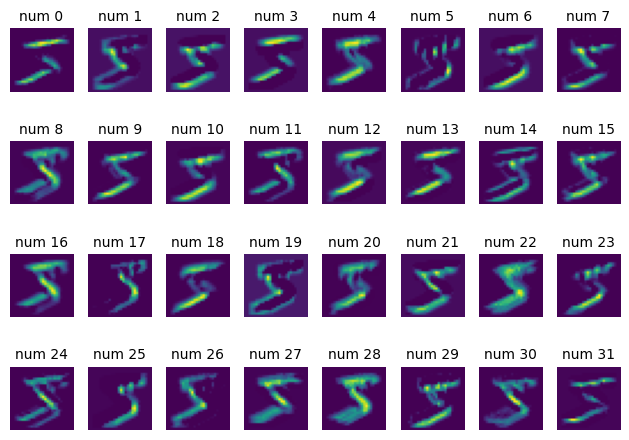

In [75]:
# 첫 번쨰 컨볼루션의 32개의 Feature Map 결과값 이미지 보기

fig, axes = plt.subplots(4, 8)
# Creates a new figure and a grid of subplot arranged in 4 rows and 8 columns,
# returning the figure object and a 2D NumPy array of Axes objects of shape(4, 8)

for i in range(32):
    ax = axes[i//8, i%8]
    # Integer division i//8 computes the row index (0-3)
    # i % 8 computes the column index (0-7).
    # TOgether they select the correct subplot in the 4 x 8 grid for the i-th feature
    ax.imshow(conv_f1[0, :, :, i], cmap = 'viridis')
    # conv2_f1: Assumed to be a 4D tensor of shape (batch_size. height. width, channels)
    # [0, :, :, i]: Selects the i-th channel of the first batch sample, yielding a (height x width) array
    # cmap = 'viridis': Applies the "viridis" colormap for visual contrast
    ax.set_axis_off()
    # This disables the axis lines, ticks, and labels on the current subplot, giving a cleaner visualization of the feature map
    ax.set_title(f'num {i}', fontsize = 10)
    # This sets a title above the subplot to indicate which feature map index is being displayed. The font size is set to 10 points

plt.tight_layout()
# This automatically adjusts the spacing between subplots so that titles, labels, and images do not overlap
plt.show()

In [85]:
# 두 번째 컨볼루션 Feature Map 확인하기: 64개 Feature map

conv_f2 = featuremap[1]
conv_f2.shape

(1, 14, 14, 64)

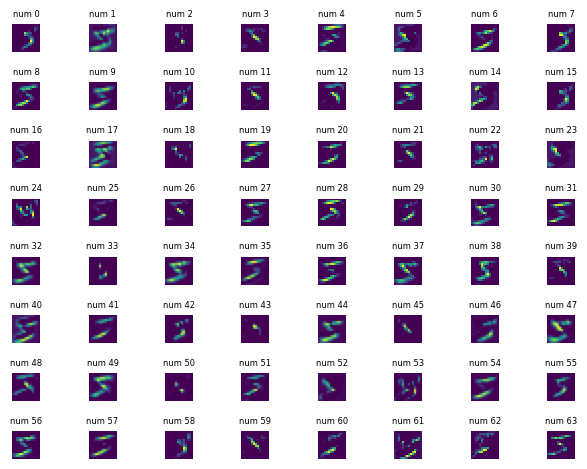

In [87]:
# 두 번째 컨볼루션 64개의 Feature Map 결과값 이미지 보기

fig, axes = plt.subplots(8, 8)

for i in range(64):
    ax = axes[i//8, i%8]
    ax.imshow(conv_f2[0, :, :, i], cmap='viridis')
    ax.set_axis_off()
    ax.set_title(f'num {i}', fontsize=6)

plt.tight_layout()
plt.show()